In [1]:
from visualize import *
import pickle
import neat
import json


In [2]:
with open('config', 'r') as f:
    config = pickle.load(f)

In [10]:
import os

root = "results/mo_rat_sphere/fronts/generation_{i}/"
for i in range(100):
    print i
    path = root.format(i=i)
    img_path = os.path.join(path, "imgs")
    if not os.path.exists(img_path):
        os.makedirs(img_path)
    
    for f in os.listdir(path):
        
        filename = os.path.join(path, f)
        if not f.endswith('.json') and not os.path.isdir(filename):
            genome = pickle.load(open(filename))

            draw_net_2(
                config, 
                genome, 
                filename = os.path.join(img_path, f),
                node_names = {
                    -1:'x',
                    -2:'y',
                    -3:'z',
                    -4:'distance',
                    -5:'1',
                    0 : 'output'
                }
            )

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [6]:
import os
import pandas as pd

best_f1 = 0.
for i in range(1,135):
    front_path = 'results/mo_rat/fronts/generation_%i' %i
    fitnesses = []

    
    for f in os.listdir(front_path):
        filename = os.path.join(front_path,f)
        if f.endswith('.json'):
            tmp = json.load(open(filename, 'r'))
            fitnesses.append(np.array(tmp['fitness']))
            if tmp['fitness'][0] < best_f1:
                best_f1 = tmp['fitness'][0]
                idx = (front_path, f)

fitnesses = np.array(fitnesses)
print fitnesses
test = fitnesses[np.lexsort((fitnesses[:,1],fitnesses[:,0]))]
print test

[[ -928  -626]
 [ -867  -669]
 [ -835  -696]
 [-1034  -403]
 [-1048  -281]
 [ -847  -675]
 [ -841  -683]
 [-1010  -500]
 [ -838  -690]
 [ -870  -664]
 [-1058  -248]
 [ -829  -714]
 [ -934  -557]]
[[-1058  -248]
 [-1048  -281]
 [-1034  -403]
 [-1010  -500]
 [ -934  -557]
 [ -928  -626]
 [ -870  -664]
 [ -867  -669]
 [ -847  -675]
 [ -841  -683]
 [ -838  -690]
 [ -835  -696]
 [ -829  -714]]


In [7]:
print best_f1, idx

-1316 ('results/mo_rat/fronts/generation_17', 'voxels_1666.json')


13


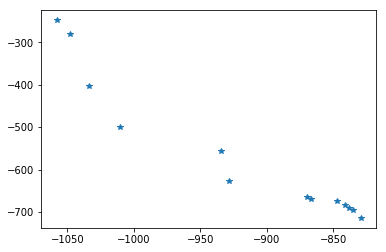

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

print len(test[:,0])
plt.figure()
plt.plot(test[:,0], test[:,1], '*')
plt.show()

In [ ]:
f = np.array([
[-478,-252],
[-465,-257],
[-385,-337],
[-357,-348],
[-336,-350],
[-400,-328],
[-428,-324],
[-487,-245],
[-623, -81],
[-564,-166],
[-602,-104],
[-584,-126],
[-444,-308],
[-537,-199],
[-481,-251],
[-455,-269],
[-506,-244]])

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

print test[:,0]
plt.figure()
plt.plot(f[:,0], f[:,1], '*')
plt.show()